 # IMDB Dataset Case Study Analysis - Exploratory Analysis and ML Model 

<b>Introduction: </b>
A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

<b>Data Description:</b>
The dataset (movie-review-data.csv) contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

<b>Problem Statement:</b>
Build Model to predict what kind of movies are more successful.
Take imdb scores as response variable and focus on operating predictions by analyzing the rest of variables in the movie data. 

#### Table of contents

1. [Exploratory Data Analysis](#id1)

    1.1 [Likes of Movie and Director on Facebook gives a good leverage](#id1.1) 
    
    1.2 [Cast and Actor Popularity](#id1.2) 
    
    1.3 [Does Title year and duration of Movie impact scores?](#id1.3) 
    
    1.4 [High Budget and Gross influences Scores](#id1.4) 
    
    1.5 [Other fetaures impacting Scores](#id1.5) 


2. [Data cleaning and preprocessing](#id2)

    2.1 [Handling NAs](#id2.1) 
    
    2.2 [Feature Engineering](#id2.2) 


3. [Baseline Model](#id3)


4. [Model building and Metrics](#id4)

    4.1 [Decision Tree](#id4.1) 
    
    4.2 [Random Forest Model](#id4.2) 
    
    4.3 [Gradient Boosting Model](#id4.3) 
    
    4.4 [Cat Boost Model](#id4.4) 




5. [Conclusion](#id5)

    
    
    
    

In [2]:
# import sys
# !{sys.executable} -m pip install seaborn uninstall

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from astropy.visualization import hist
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

Read the dataset and initial sanity checks

In [5]:
df=pd.read_csv('movie_review_data.csv')
df.shape

(5043, 28)

In [6]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


We seems to have some duplicates when we check based on movie URLs. Lets remove them

In [8]:
df['movie_imdb_link'].value_counts()

http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0232500/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2224026/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt1976009/?ref_=fn_tt_tt_1    3
                                                       ..
http://www.imdb.com/title/tt0918927/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0071853/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0425637/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0790712/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0077294/?ref_=fn_tt_tt_1    1
Name: movie_imdb_link, Length: 4919, dtype: int64

In [9]:
dup=df['movie_imdb_link'].value_counts()
dup

http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0232500/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2224026/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt1976009/?ref_=fn_tt_tt_1    3
                                                       ..
http://www.imdb.com/title/tt0918927/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0071853/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0425637/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0790712/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0077294/?ref_=fn_tt_tt_1    1
Name: movie_imdb_link, Length: 4919, dtype: int64

In [10]:
df['movie_imdb_link'].drop_duplicates(keep='first',inplace=True)

Lets look at the distribution of our target variable. Taking the bin size from Freedman's algorithm

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

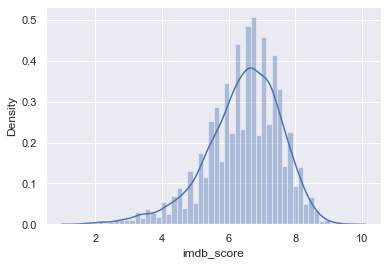

In [11]:
print(df['imdb_score'].describe())
sns.set_theme()
sns.distplot(df['imdb_score'],bins=50,hist_kws={'alpha': 0.4})

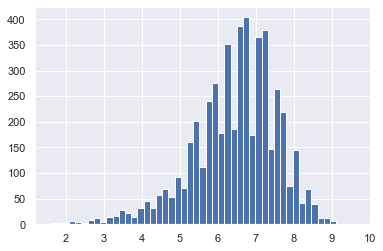

In [14]:
ar=hist(df['imdb_score'],bins='freedman',)


In [15]:
df['imdb_score_bin']=pd.cut(df['imdb_score'],bins=len(ar[1])-1)

In [16]:
df['imdb_score_bin']=df['imdb_score_bin'].astype(str)

In [17]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_score_bin                 0
dtype: int64

<a id="id1"></a>

### Exploratory Data Analysis

#### Handling NAs for a few Numerical features 

In [25]:
num_columns=['director_facebook_likes',
 'movie_facebook_likes',
 'title_year',
 'cast_total_facebook_likes',
 'num_voted_users',
 'num_critic_for_reviews',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_user_for_reviews',
 'actor_2_facebook_likes',
 'duration']

In [27]:
num_mean=['director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
          'actor_2_facebook_likes','duration']

for col in num_mean:
    df.loc[df[col].isna(),col]=df[col].mean()

In [28]:
num_median=['title_year','duration']
for col in num_median:
    df.loc[df[col].isna(),col]=df[col].median()

In [29]:
num_zero=['num_critic_for_reviews','num_user_for_reviews']
for col in num_zero:
    df.loc[df[col].isna(),col]=0

#### Building some helper functions for Seaborn plotting 

In [21]:
"""
Function to plot the distribution of the independant variables w.r.t the target variable
"""
def plot_dist(dataf=df,x_feat='content_rating',labels=None,fig=None,ax1=None):
    if fig is None:
        ax1 = sns.set_style(style=None, rc=None )
        fig, ax1 = plt.subplots(figsize=(12,6))
    if labels is None:
        labels=list(dataf[x_feat].value_counts().index)
    df_samp=dataf[[x_feat,'imdb_score']].groupby([x_feat]).agg("mean")
    plot=sns.countplot(data = dataf, x=x_feat, alpha=0.5, order=labels,ax=ax1,palette="summer")
    plot.set_xticklabels(labels, fontsize=9, rotation=30, ha= 'right')
    ax1.tick_params(axis='y')
    plt.ylabel("# Movies")
    plt.xlabel(x_feat)
    ax2 = ax1.twinx()
    sns.lineplot(data = df_samp['imdb_score'].values, marker='o', sort=False, ax=ax2)
    total = len(df)
    for p in plot.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plot.annotate(percentage, (x, y), ha='center', va='center',fontsize=7.5)
    plot.axhline(df_samp['imdb_score'].mean())
    plt.ylabel("IMDB rating")
    plt.title("Distribution of {}".format(x_feat)) 
    sns.despine()

In [30]:
#Function to bin numerical variables before distribtion plot
def bin_and_plot(num_columns):
    bin_columns=[]
    for col in num_columns:
        colname=col+"_bin"
        ar=hist(df[col],bins='freedman',)
        if len(ar[1])<50:
            num_bins= len(ar[1])-1
        else:
            num_bins=50
        df[colname]=pd.cut(df[col],bins=num_bins)
        bin_columns.append(colname)
    plt.clf()

    for colname in bin_columns:  
        labels=list(map(str,df[colname].unique().sort_values()))
        df[colname]=df[colname].astype(str)
        plot_dist(df,x_feat=colname,labels=labels,fig=None,ax1=None)

<a id="id1.1"></a>

#### 1. Popularity of Movie and Director

1. The popularity of the director and movie has a positive effect on the imdb ratings. Barring the first bin, others show a higher than average scores of >6.5. This is evident especially on the popularity of the movie.

2. Directors name is not available for about 100 movies. Most of them are TV Series based on the ratings. Therefore there would be multiple directors for them. Creater would be a more equivalent role in this case.

<Figure size 432x288 with 0 Axes>

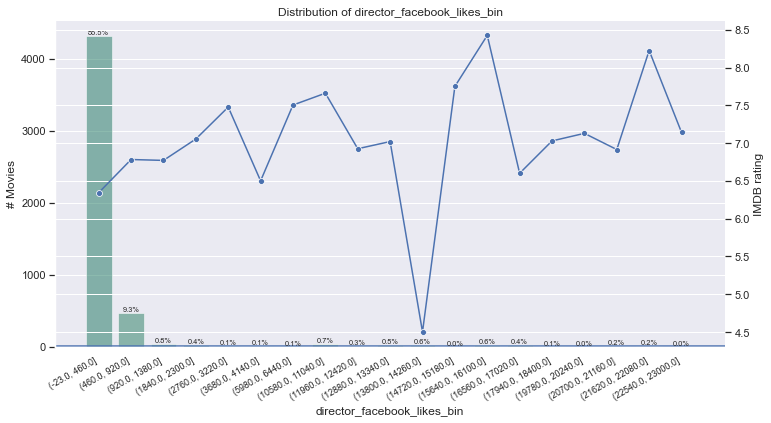

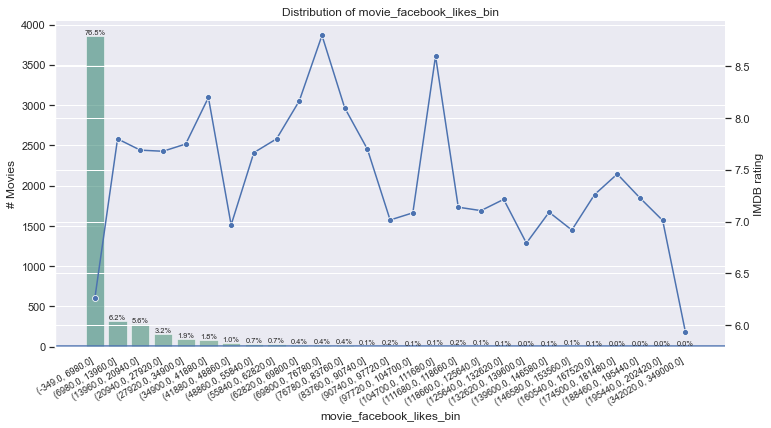

In [31]:
dir_columns=['director_facebook_likes', 'movie_facebook_likes']
bin_and_plot(dir_columns)

<a id="id1.2"></a>

#### 2. Popularity of Casts
The overall total like of the cast didnt seem to have quite trend, the likes of actor_2 had a slight upward trend, barring in one group. We could say that having a strong/popular lead 2 might slightly increase the chance of a good movie

<Figure size 432x288 with 0 Axes>

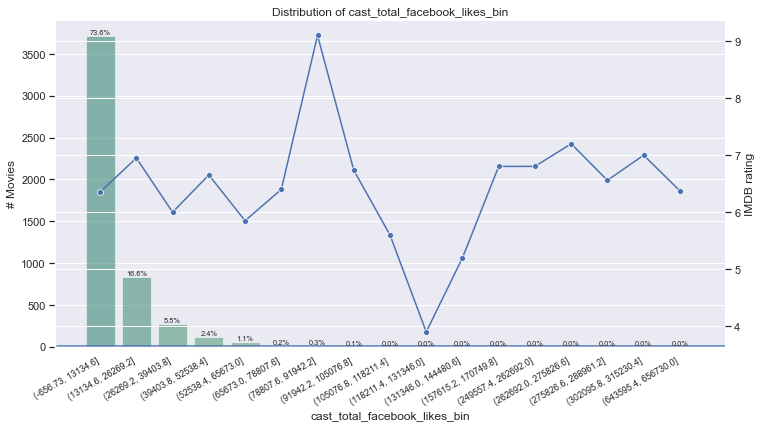

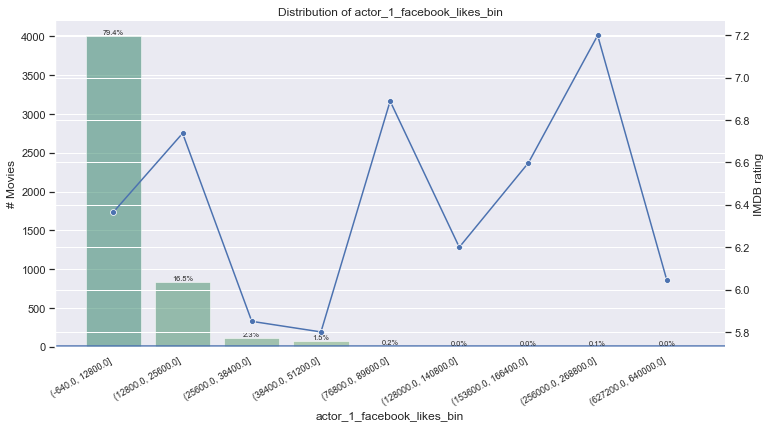

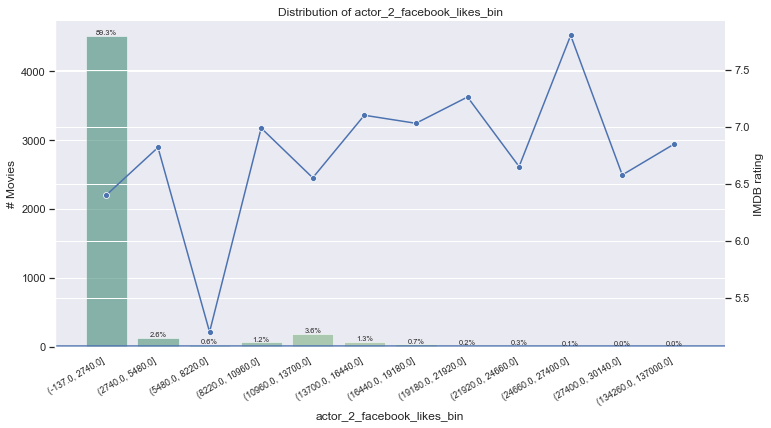

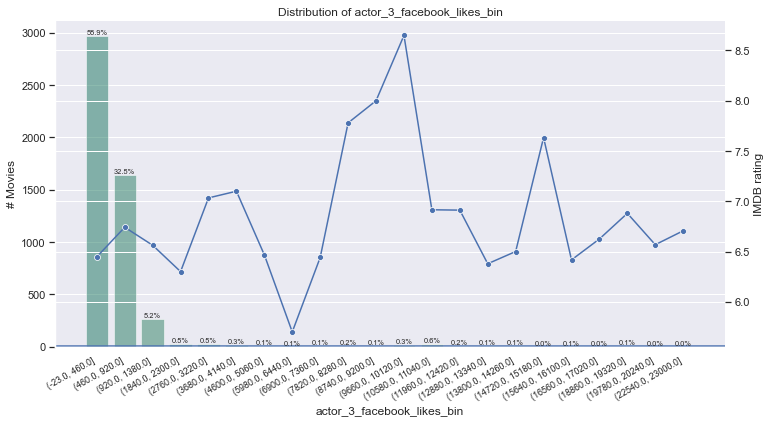

In [32]:
cast_fb_columns=[ 'cast_total_facebook_likes',
 'actor_1_facebook_likes',
 'actor_2_facebook_likes', 'actor_3_facebook_likes']
bin_and_plot(cast_fb_columns)

<a id="id1.3"></a>

#### 3. Title year and Duration

1. The older movies in the dataset have a comparatively better scores although their volumes are lower
2. Most of movies that have scores below 5 have the duration around 1.5 hrs. The scores seem to be climbing up for movies that are upto 2hours 40 mins long. After that they dont seem to follow the trend

Text(0.5, 1.0, 'Movie budget vs Imdb score')

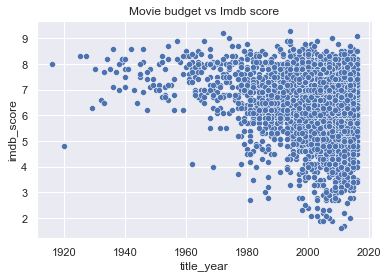

In [33]:
sns.scatterplot(data=df[~df['budget'].isna()],y='imdb_score',x='title_year')
plt.title('Movie budget vs Imdb score')

Text(0.5, 1.0, 'Movie budget vs Imdb score')

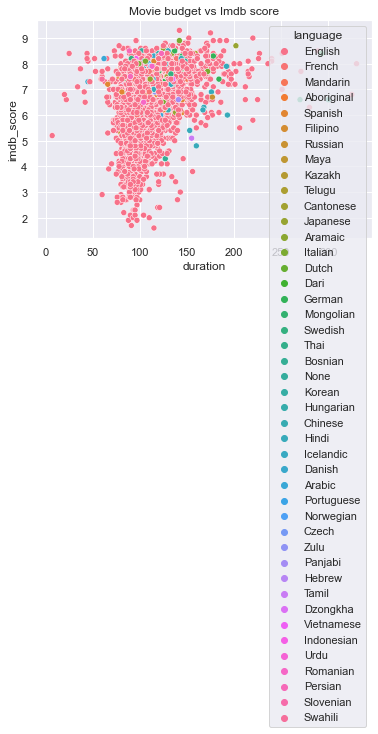

In [34]:
sns.scatterplot(data=df[~df['budget'].isna()],y='imdb_score',x='duration',hue='language')
plt.title('Movie budget vs Imdb score')

<Figure size 432x288 with 0 Axes>

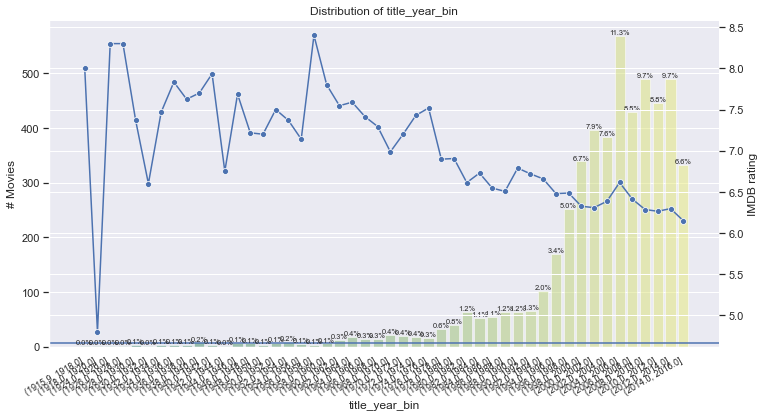

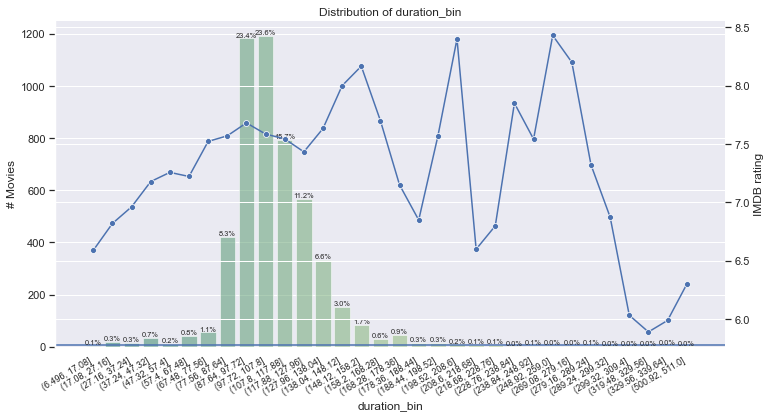

In [35]:
td_columns=['title_year','duration']
bin_and_plot(td_columns)

<a id="id1.4"></a>

#### 4. Budget and Profit

1. The Budget field seemed to have outliers. It was interesting that all of the Top 10 movies of high budget was not from Hollywood. So this could mean the currencies were not normalized and they could be within their local currency. This may affect our models if not normalized by each country. For the purpose of this excercise, we could skip the non US made Movies for this reason. 

2. Movies with high budget and gross both seem to have higher scores. Although there are instances where good scores are there for smaller budget/gross movies.

2. We could derive the profit the movie made by subtracting the budget from the gross. Most movies that have high profist also have high score. Soemtimes even if the movies didnt make much profit they still had good ratings

3. Since the movies made from 1970s are included, we should account for inflation.

<AxesSubplot:xlabel='budget'>

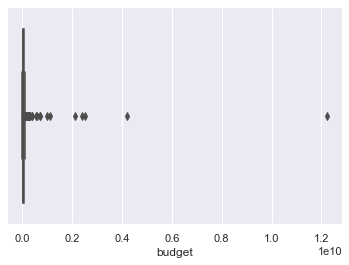

In [36]:
sns.boxplot(df['budget'])

In [37]:
df[['budget','country','movie_title']].sort_values(by='budget',ascending=False).head(10)

,budget,country,movie_title
2988,1.221550e+10,South Korea,The Host
3859,4.200000e+09,South Korea,Lady Vengeance
3005,2.500000e+09,Hungary,Fateless
2323,2.400000e+09,Japan,Princess Mononoke
2334,2.127520e+09,Japan,Steamboy
3423,1.100000e+09,Japan,Akira
4542,1.000000e+09,Japan,Godzilla 2000
3075,7.000000e+08,India,Kabhi Alvida Naa Kehna
3851,7.000000e+08,Spain,Tango
3273,6.000000e+08,India,Kites


In [38]:
df[['gross','country','movie_title']].sort_values(by='gross',ascending=False).head(10)

,gross,country,movie_title
0,760505847.0,USA,Avatar
26,658672302.0,USA,Titanic
29,652177271.0,USA,Jurassic World
794,623279547.0,USA,The Avengers
17,623279547.0,USA,The Avengers
66,533316061.0,USA,The Dark Knight
240,474544677.0,USA,Star Wars: Episode I - The Phantom Menace
3024,460935665.0,USA,Star Wars: Episode IV - A New Hope
8,458991599.0,USA,Avengers: Age of Ultron
3,448130642.0,USA,The Dark Knight Rises


In [39]:
df_hwd=df[df['country']=='USA']
df_hwd.shape

(3807, 37)

Text(0.5, 1.0, 'Movie budget vs Imdb score')

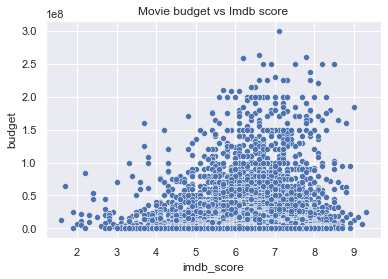

In [40]:
sns.scatterplot(data=df_hwd[~df_hwd['budget'].isna()],x='imdb_score',y='budget')
plt.title('Movie budget vs Imdb score')

Text(0.5, 1.0, 'Movie Gross vs Imdb score')

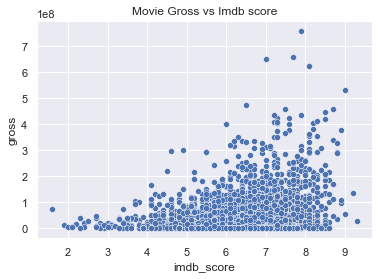

In [41]:
sns.scatterplot(data=df_hwd[~df_hwd['gross'].isna()],x='imdb_score',y='gross')
plt.title('Movie Gross vs Imdb score')

Text(0.5, 1.0, 'Movie profit vs Imdb score')

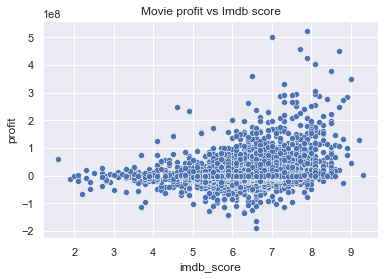

In [42]:
df_hwd['profit']=df_hwd['gross']-df_hwd['budget']
sns.scatterplot(data=df_hwd[~df_hwd['profit'].isna()],x='imdb_score',y='profit')
plt.title('Movie profit vs Imdb score')

<a id="id1.5"></a>

#### 5. Analysis of other Movie features with response variable

1. Assigning 'NA' for Null values.

This can show if any of the Null values are correlated with the imdb scores, which would otherwise be missed. Since the plots would typically ignore these blank values

1. Black and White movies seem to be rated higher on an average. Although the volume is only around 4.1%


2. Almost 93% of movies are in English. Some of the languages like Russian, Bosnian, Chinese have very low averaged

3. The TV-MA (Mature in TV) content rating is way above the rest. Although less than 1% of movies are from that list. 

4. 6.5% of movies have aspect Ratio as NA which comparatively have lower ratings. Some of these movies seem to games based on movies or lesser known series

In [43]:
cat_columns_all=['director_name','actor_2_name','actor_1_name',
                 'actor_3_name','plot_keywords','country',
                 'movie_imdb_link','movie_title','genres','color',
                 'facenumber_in_poster','language','content_rating',
                 'aspect_ratio']

for col in cat_columns_all:
    df.loc[df[col].isna(),col]='NA'

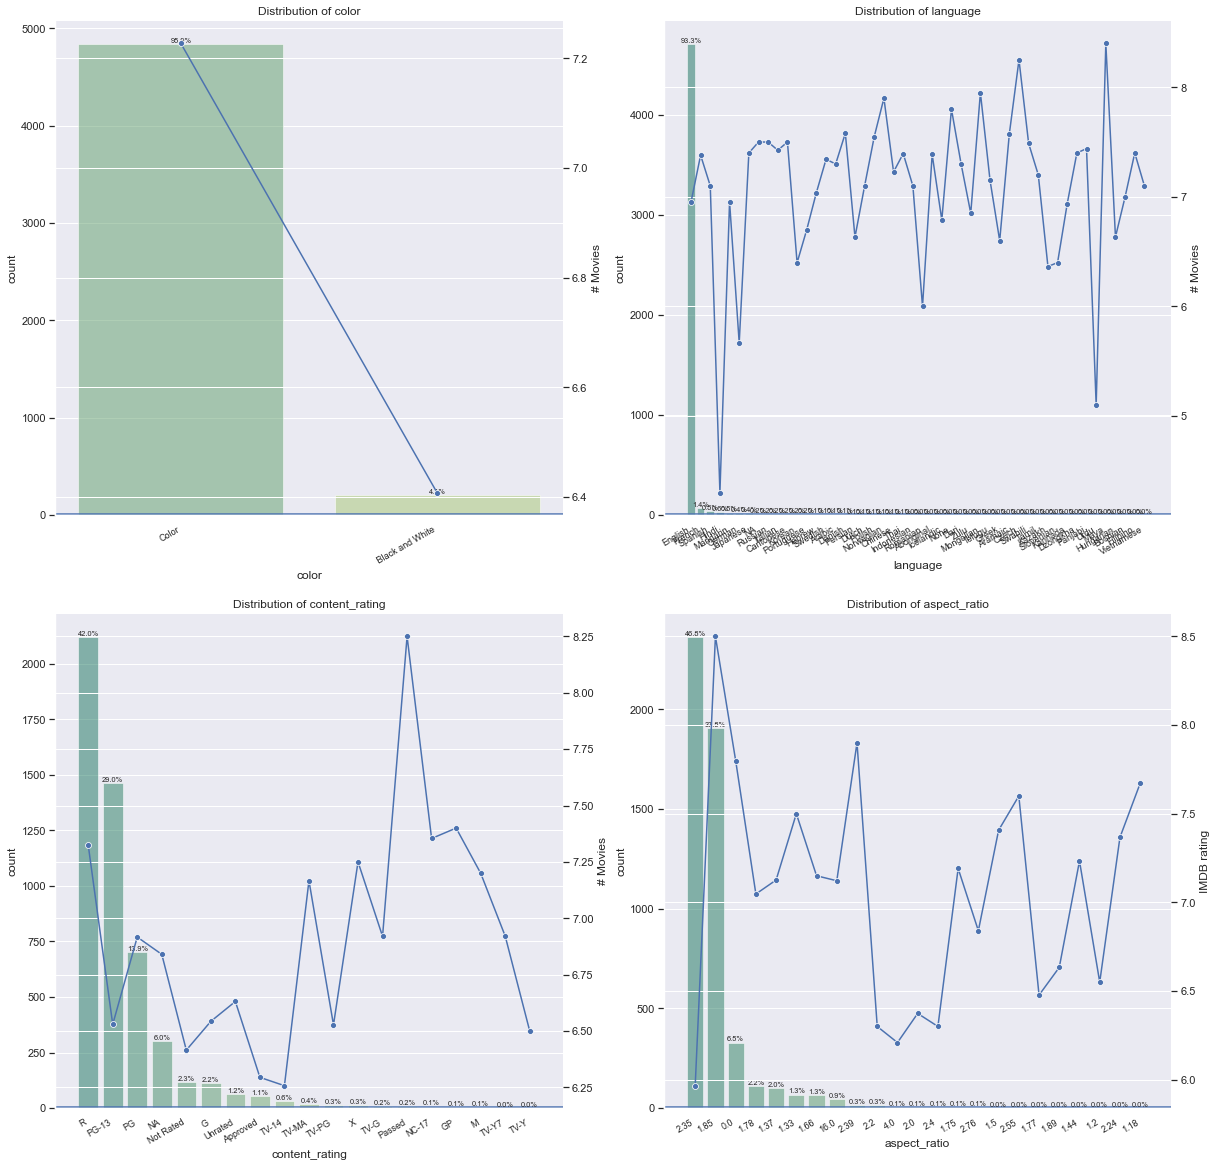

In [111]:
#Considering only a few of the categorical columns for distribution analysis. Others do not make much sense for this plot
cat_columns=['color','language','content_rating','aspect_ratio']
df['aspect_ratio']=df['aspect_ratio'].astype(str)

fig, ax = plt.subplots(round(len(cat_columns) / 2), 2, figsize = (20, 20))
for i, ax in enumerate(fig.axes):
    plot_dist(df,x_feat=cat_columns[i],fig=fig,ax1=ax)

<a id="id2"></a>

### 2. Data Cleaning and pre-processing

#### 2.1 Handling NAs

1. Assigning color for movies that have NA since all are made after 1990
2. Assign gross as budget and vice versa for values that have either of them. For both as blanks take the median
3. Adjusted for inflation in gross, budget. rate is calculated as 2.0% based on some estimateions from https://smartasset.com/investing/inflation-calculator
4. Handling NAs for other numeric fields are covered in the EDA section above



In [46]:
df.loc[(df['color']=='NA'),'color']='Color'

In [48]:
# df.loc[(df['aspect_ratio']=='NA'),'aspect_ratio']=0
# df['aspect_ratio']=df['aspect_ratio'].astype('float32')

In [49]:
df['budget']=np.where((df['budget'].isna() & (~df['gross'].isna())),df['gross'],df['budget'] )
df['gross']=np.where((df['gross'].isna() & (~df['budget'].isna())),df['budget'],df['gross'] )

In [50]:
num_median=['budget','gross']
for col in num_median:
    df.loc[df[col].isna(),col]=df[col].median()

In [51]:
df['adj_year']=2016-df['title_year']

<a id="id2.2"></a>

#### 2.2 Feature Engineering

1. Profit of the movie from gross and budget
2. Past imdb scores of directors and actors. Current scores are not included since it induces target leakage

In [52]:
def inflation_corrected_amount(principle,  time,rate=2.0): 
    return(principle * (pow((1 + rate / 100), time)))

In [53]:
df['gross_adj']=df.apply(lambda x: inflation_corrected_amount(x['gross'],x['adj_year']),axis=1)
df['budget_adj']=df.apply(lambda x: inflation_corrected_amount(x['budget'],x['adj_year']),axis=1)

In [54]:
df['profit_adj']=df['gross_adj']-df['budget_adj']

In [55]:
def get_past_score(name,year,field='director_name'):
    val=df.loc[(df[field]==name) & (df['title_year']<year),'imdb_score'].mean()
    if math.isnan(val):
        return 0
    else:
        return val
    

In [56]:
df['director_past_imdb_score']= df.apply(lambda x: get_past_score(x['director_name'],x['title_year']),axis=1)

In [57]:
df['actor2_past_imdb_score']= df.apply(lambda x: get_past_score(x['actor_2_name'],
                                                                x['title_year'],'actor_2_name'),axis=1)

In [58]:
df['actor1_past_imdb_score']= df.apply(lambda x: get_past_score(x['actor_1_name'],
                                                                x['title_year'],'actor_1_name'),axis=1)

In [59]:
df['actor1_as_actor2_past_imdb_score']= df.apply(lambda x: get_past_score(x['actor_1_name'],
                                                                x['title_year'],'actor_2_name'),axis=1)

In [60]:
df['actor2_as_actor1_past_imdb_score']= df.apply(lambda x: get_past_score(x['actor_2_name'],
                                                                x['title_year'],'actor_1_name'),axis=1)

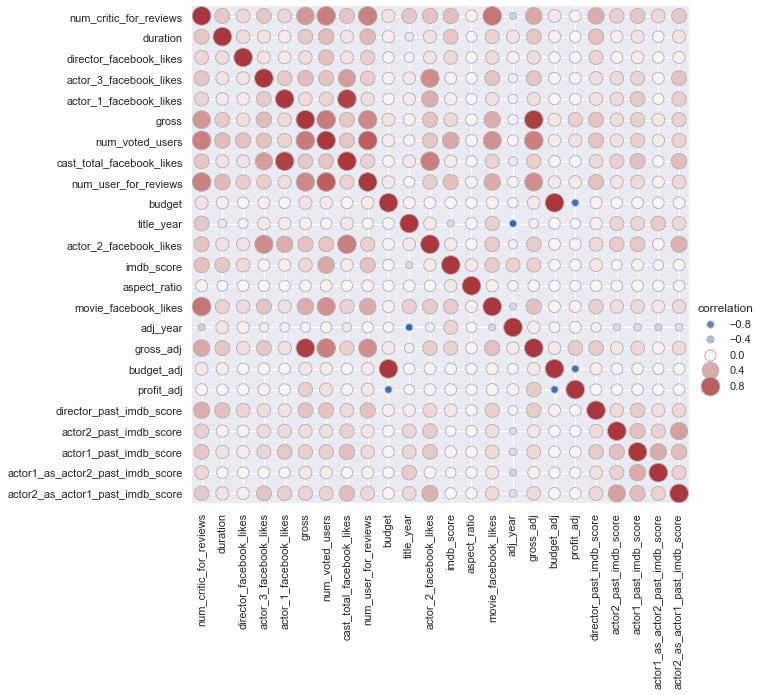

In [61]:
def corr_plot(df):
    # Compute a correlation matrix and convert to long-form
    corr_mat = df.corr().stack().reset_index(name="correlation")

    # Draw each cell as a scatter point with varying size and color
    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        height=10, sizes=(50, 350), size_norm=(-.2, .6),
    )

    # Tweak the figure to finalize
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)
    for artist in g.legend.legendHandles:
        artist.set_edgecolor(".7")

corr_plot(df)

<a id="id3"></a>

### 3. Baseline model

The baseline model, we can predict all the movies that are above average as good movies. Sice our average score is 6.44 we can consider the scores that are above 7 as good movies and the remaining as not so good.
Based on this we to get a baseline prediction which would predict all as the majority class

In [62]:
df['good_score']=0
df.loc[df['imdb_score']>=7.0,'good_score']=1

In [63]:
df['good_score'].value_counts()

0    3265
1    1778
Name: good_score, dtype: int64

In [64]:
df['baseline_predicted']=0

In [65]:
accuracy_score(df['good_score'],df['baseline_predicted'])

0.6474320840769383

In [66]:
confusion_matrix(df['good_score'],df['baseline_predicted'])

array([[3265,    0],
       [1778,    0]], dtype=int64)

<a id="id4"></a>

### 4. Model building

In [116]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold,train_test_split
from numpy import mean,std

In [141]:
def get_model_metrics(m,x_test,y_true,y_pred):
    plot_confusion_matrix(m,x_test,y_true,cmap=plt.cm.Blues)
    plt.show()
    acc=accuracy_score(y_pred=y_pred,y_true=y_true)
    return acc
   

In [118]:
base_df=df[['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 
       'actor_1_facebook_likes', 
        'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 
        'actor_2_facebook_likes',
      'aspect_ratio', 'movie_facebook_likes', 
       'gross_adj', 'budget_adj', 'profit_adj', 'actor2_past_imdb_score','country',
       'actor1_past_imdb_score', 'actor1_as_actor2_past_imdb_score',
       'director_past_imdb_score', 'actor2_as_actor1_past_imdb_score', 'good_score']]

In [119]:
base_df.shape

(5043, 21)

In [143]:
X = base_df.drop(['good_score','country'], axis = 1)
y = base_df['good_score']

In [144]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 24)

<a id="id4.1"></a>

#### 4.1. Decision Tree

THis is the simplest form of Tree which identifies rule which is then used to split and assign the leaf nodes to maximise our success metric

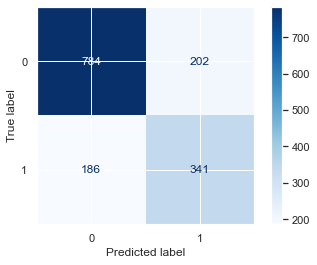

Accuracy score: 0.7435558493060146


In [145]:
#train classifier
clf = tree.DecisionTreeClassifier() 
clf=clf.fit(X_train, y_train) 
clf_prediction = clf.predict(X_test) 
dt_acc=get_model_metrics(clf,X_test,y_test, clf_prediction)
print('Accuracy score: {}'.format(dt_acc))

<a id="id4.2"></a>

##### 4.2. Random Forest
Random forest is a bagging tree based model and usually it gives a good results because it is based on collection trees. Although the numbers are much better than our baseline and has predctions on both classes

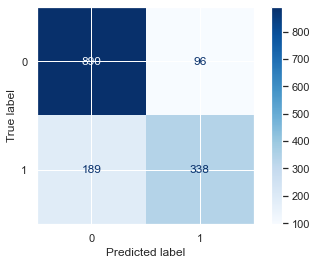

Accuracy score: 0.8116325181758096


In [146]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_acc=get_model_metrics(rf,X_test,y_test, rf_y_pred)
print('Accuracy score: {}'.format(rf_acc))

<a id="id4.3"></a>

##### 4.3. Gradient Boost Method
Sometimes the expection is that the xgboost model to have given better performance but is still comparable to the random forest model.

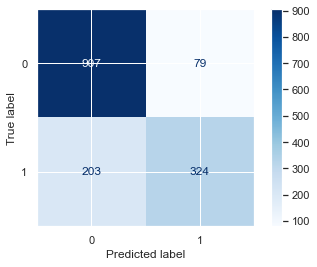

Accuracy score: 0.813615333773959


In [147]:
xgb_model = XGBClassifier(random_state=42)
X_train.loc[(X_train['aspect_ratio']=='NA'),'aspect_ratio']=0
X_train['aspect_ratio']=X_train['aspect_ratio'].astype('float32')
X_test.loc[(X_test['aspect_ratio']=='NA'),'aspect_ratio']=0
X_test['aspect_ratio']=X_test['aspect_ratio'].astype('float32')

xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
gd_acc=get_model_metrics(xgb_model,X_test,y_test, xgb_y_pred)
print('Accuracy score: {}'.format(gd_acc))

<a id="id4.4"></a>

##### 4.4. Catboost model
The Cat boost model has gained popularity in the recently for its superior results and is known to be one of the best boosting algorithms if we have categorical variables.
The results from catboost are also comparable to our xgboost and random forest model.



In [149]:
X = base_df.drop(['good_score'], axis = 1)
y = base_df['good_score']
X['aspect_ratio']=X['aspect_ratio'].astype('str')

In [150]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 24)

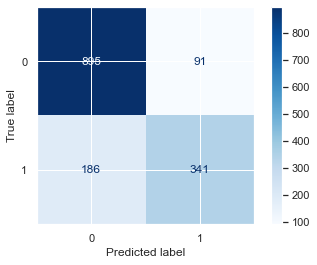

Accuracy score: 0.8169200264375414


In [151]:
cat_model = CatBoostClassifier(verbose=0, n_estimators=90)
cat_idx=[X_train.columns.get_loc(c) for c in ['aspect_ratio','country']]
cat_model.fit(X_train, y_train,cat_features=cat_idx)
cat_y_pred = cat_model.predict(X_test)
cb_acc=get_model_metrics(cat_model,X_test,y_test, cat_y_pred)
print('Accuracy score: {}'.format(cb_acc))

<a id="id5"></a>

In [166]:
scores=[dt_acc,rf_acc,gd_acc,cb_acc]
scores*=100
algos=['Decision Trees','Random Forest','GBM','Cat Boost']
pd.DataFrame(zip(algos,scores),columns=['Algorithm','Accuracy score'])

,Algorithm,Accuracy score
0,Decision Trees,0.743556
1,Random Forest,0.811633
2,GBM,0.813615
3,Cat Boost,0.816920


### 5. Conclusion

The features to making a sucessful imdb rated movies was explored. A baseline model was created and subsequent set of machine learning models were built that outperformed our baseline by a significant margin.

In order to improve the scores, some of the additional features that were not inlcuded like the Title year, content rating etc could be tried out to check if they improve the scores. The budget field would need to normalized to reflect the uniform currency. Model Fuinetuning and grid search is also needed to improve the accuracy.

Nevertheless our current model is able to predict a good movie with 80%+ accuracy.